# Moore's Law of Transistors

## Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing and Analysing the Dataset

In [2]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2024-01-31 13:19:59--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.5’

moore.csv.5         100%[===================>]   2.25K  --.-KB/s    in 0s      

2024-01-31 13:20:00 (20.5 MB/s) - ‘moore.csv.5’ saved [2302/2302]



In [3]:
data = pd.read_csv('moore.csv', header=None).to_numpy()

In [4]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [5]:
X = data[:,0].reshape(-1,1)
Y = data[:,1]

In [6]:
X.shape

(162, 1)

## Plotting the data

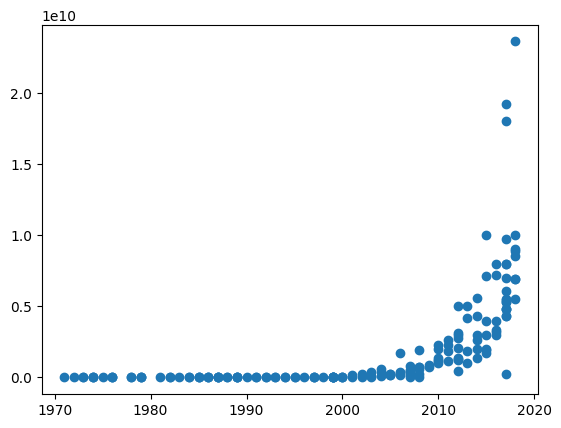

In [7]:
plt.scatter(X,Y);

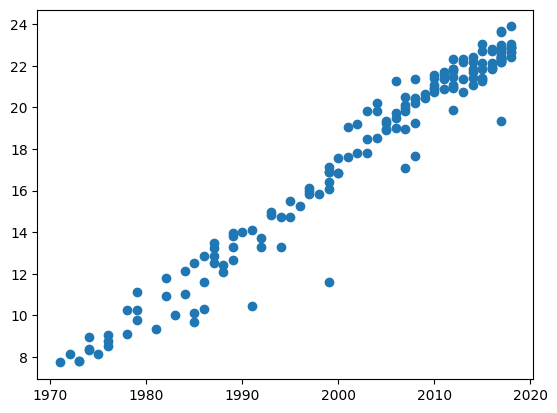

In [8]:
# Use log to cancel out exponential growth
Y = np.log(Y)
plt.scatter(X,Y);

In [9]:
X = X - X.mean()

## Building and Training the model

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1, activation='relu')
])

In [11]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

In [12]:
def schedule(epochs, lr):
  if epochs >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [13]:
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 5ms/step - loss: 157.8794 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 162.5323 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 4ms/step - loss: 123.2629 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 116.2695 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 4ms/step - loss: 113.4145 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 108.4445 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 5ms/step - loss: 104.7244 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 4ms/step - loss: 103.7256 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 4ms/step - loss: 103.2655 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 5ms/step - loss: 101.3129 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 5ms/step - los

## Plotting the loss

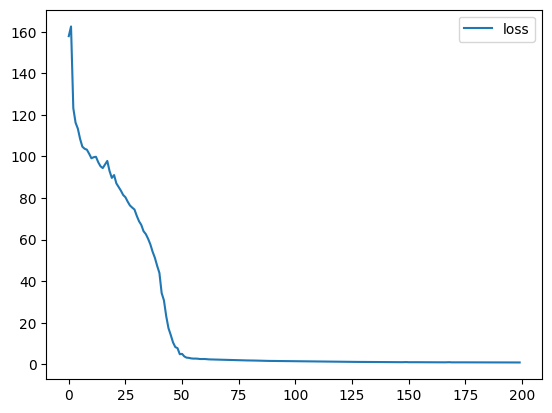

In [14]:
plt.plot(r.history['loss'], label='loss')
plt.legend();

In [15]:
model.evaluate(X, Y)

6/6 [==============================] - 0s 5ms/step - loss: 0.9270


0.92698734998703

### Moore's Law states that the number of transistors on a microchip doubles about every two years, though the cost of computers is halved.

### Evaluating the result of the theory:

In [16]:
model.layers[0].get_weights()

[array([[0.3460151]], dtype=float32), array([17.534176], dtype=float32)]

In [17]:
a = model.layers[0].get_weights()[0][0,0]
a

0.3460151

In [18]:
np.exp(a)

1.413424

In [19]:
print(f"Time taken for transistors to double according to moore's law: {round(np.log(2) / 0.34842575, 3)} years.")

Time taken for transistors to double according to moore's law: 1.989 years.
